# pyCMBS - Basics

This short demo shows some basics of working with pyCMBS. For more detailed examples and comprehensive documentation, please refer to

* The [project page on github](https://github.com/pygeo/pycmbs)
* The [online documentation](http://pythonhosted.org/pycmbs/) and in particular the [pyCMBS gallery](http://pythonhosted.org/pycmbs/gallery.html)

Unique features

* open source
* batteries included: python
* object oriented
* fast processing by [cdo](https://code.zmaw.de/projects/cdo) integration

Data used in this example can be downloaded from the web:

* CRU NCEP reanalysis monthly mean air temperature fields
* [NAO index](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii)

In [4]:
%matplotlib inline
import os

In [5]:
# we download some NCEP data
if not os.path.exists('air.mon.mean.nc'):
    !wget --ftp-user=anonymous --ftp-password=nothing ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

## Some general basics

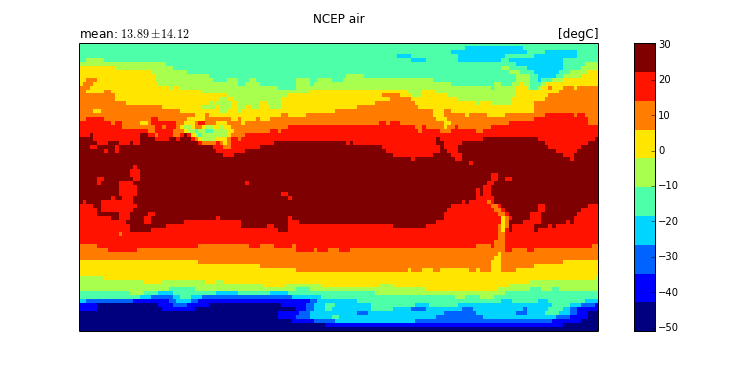

In [6]:
import numpy as np
from pycmbs.data import Data
from pycmbs.mapping import map_plot  # note that map_plot is just a wrapper function for a more generic plotting interface!

ncep = Data('air.mon.mean.nc', 'air', read=True, label='NCEP air')
f = map_plot(ncep, show_stat=True) #, use_basemap=True, show_zonal=True)

INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


/usr/local/lib/python2.7/dist-packages/cartopy/crs.py:1211: UserWarning: The Robinson projection in the v4.8.x series of Proj.4 contains a discontinuity at 40 deg latitude. Use this projection with caution.
  warnings.warn('The Robinson projection in the v4.8.x series '


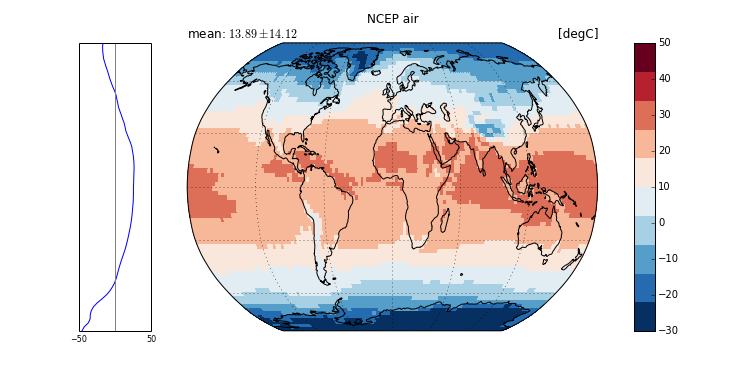

In [7]:
# The same plot, but with setting some additional options ...
f = map_plot(ncep, show_stat=True, use_basemap=True, show_zonal=True, cmap_data='RdBu_r', vmin=-30., vmax=50.)

Note, if this plot looks weird to you, then you have most likely not properly installed the cartopy package.

### Some additional data

We now also load some additional data from the paper of [Cowtan and Way (2014).](http://onlinelibrary.wiley.com/doi/10.1002/qj.2297/abstract). This dataset contains air temperature anomalies. The data is provided from the authors website [here](http://www-users.york.ac.uk/~kdc3/papers/coverage2013/methods.html). The data can be obtained with the following command:

In [8]:
# download data from Cowtan & Way (2014); needs only to be done once
if not os.path.exists('had4_hybrid.nc.gz'):
    if not os.path.exists('had4_hybrid.nc'):
        !wget http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_hybrid.nc.gz
if not os.path.exists('had4_hybrid.nc'):
    !gzip -d had4_hybrid.nc.gz

Error in calling operator gridarea with:
>>> cdo -f nc gridarea had4_hybrid.nc had4_hybrid_cell_area.nc<<<
cdo gridarea (Warning): Found more than 1 grid, using the first one!
cdo gridarea (Abort): Unsupported grid type: generic

   Seems that cell_area file can not be generated, try to generate in temporary directory
Error in calling operator gridarea with:
>>> cdo -f nc gridarea had4_hybrid.nc /tmp/cell_area_zVB6bv.nc<<<
cdo gridarea (Warning): Found more than 1 grid, using the first one!
cdo gridarea (Abort): Unsupported grid type: generic

   Try to calculate gridarea using alternative grid
   Cell area file generated sucessfully in temporary file: /tmp/cell_area_ti7eq8.nc


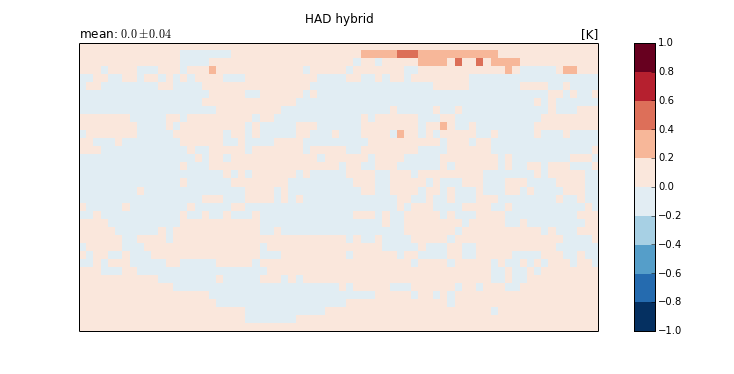

In [9]:
had = Data('had4_hybrid.nc', 'temperature_anomaly', read=True, label='HAD hybrid', lat_name='latitude', lon_name='longitude')
f1 = map_plot(had,show_stat=True, cmap_data='RdBu_r', vmin=-1., vmax=1.)

Note that all spatial average calculations are done in a proper way by applying area weighting. If you are interested in seeing the cell area of each grid cell, then look on the cell_area attribute.

## How does the global mean tempature evolve?

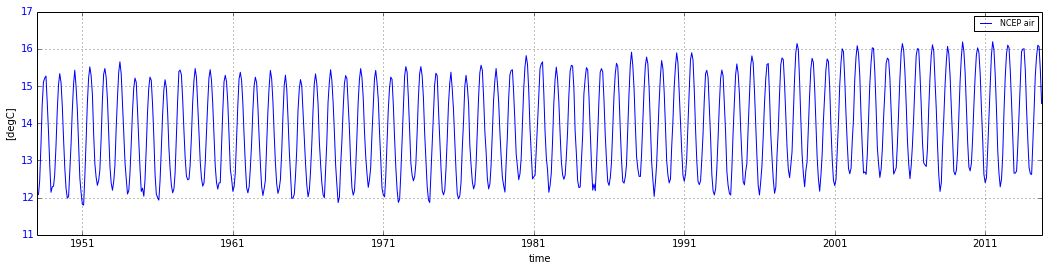

In [10]:
from pycmbs.plots import LinePlot
L = LinePlot(figsize=(18,4))
L.plot(ncep)
L.ax.grid()
L.legend()

### ... o.k., but what about the anomalies

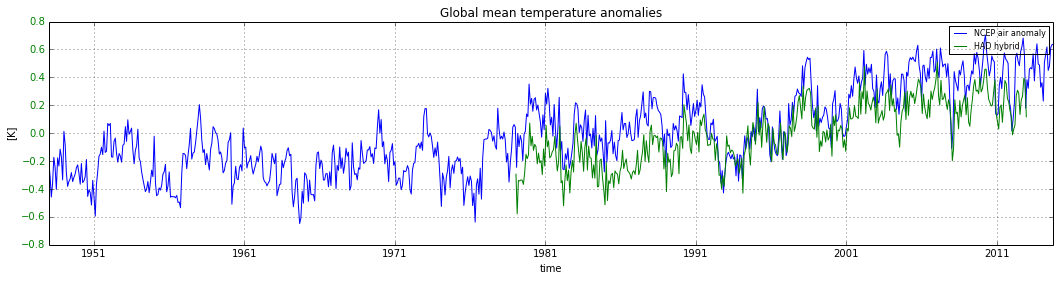

In [11]:
L = LinePlot(figsize=(18,4))
L.plot(ncep.get_deseasonalized_anomaly(base='all'))  # calculate anomalies on the fly
L.plot(had)
L.ax.grid()
L.legend()
L.ax.set_title('Global mean temperature anomalies')

## Interested in timeseries of climatologies ?

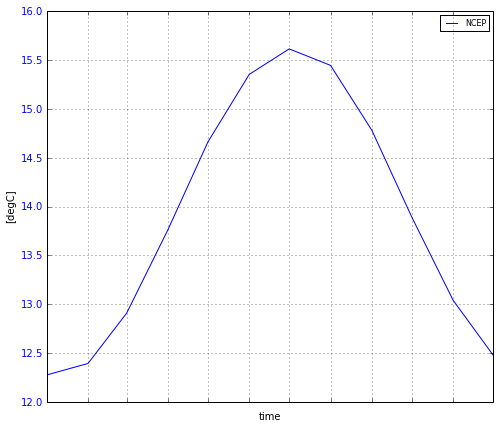

In [12]:
from pycmbs.plots import map_season
ncep_clim = ncep.get_climatology(return_object=True)
had_clim = had.get_climatology(return_object=True)

L = LinePlot()
L.plot(ncep_clim, label='NCEP')
L.legend()
L.ax.set_xticklabels([])
L.ax.grid()

In [13]:
# f = map_season(ncep_clim, vmin=-20., vmax=40.) #, use_basemap=True)

## Interested in temporal trends?

In [14]:
R, S, I, P = ncep.temporal_trend(return_object=True) #, pthres=0.05)

Calculating correlation ...


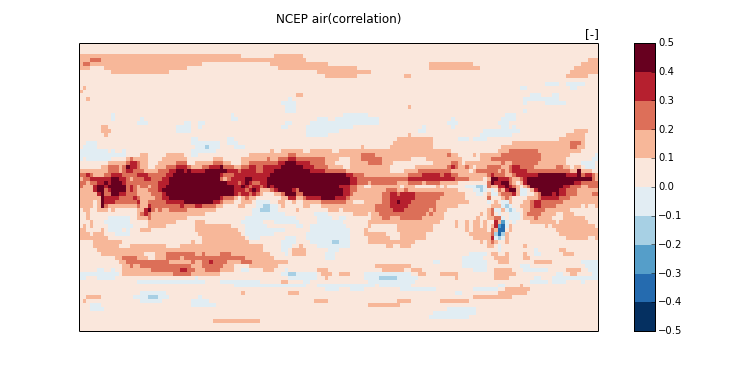

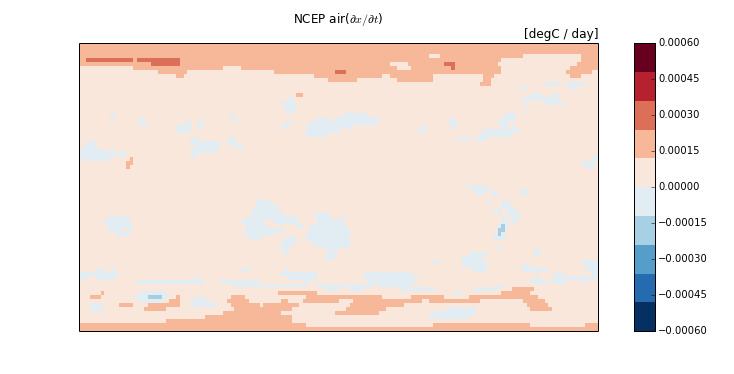

In [15]:
f = map_plot(R, vmin=-0.5, vmax=0.5, cmap_data='RdBu_r')
f = map_plot(S, cmap_data = 'RdBu_r', vmin=-0.0006, vmax=0.0006)

### Correlation with some particular timeseries?

Let's say you want to correlate a timeseries of a climate index with your 3D data field. This is very easy to do. We download the NAO index as an example from [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/nao.shtml).

In [16]:
if not os.path.exists('norm.nao.monthly.b5001.current.ascii'):
    !wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

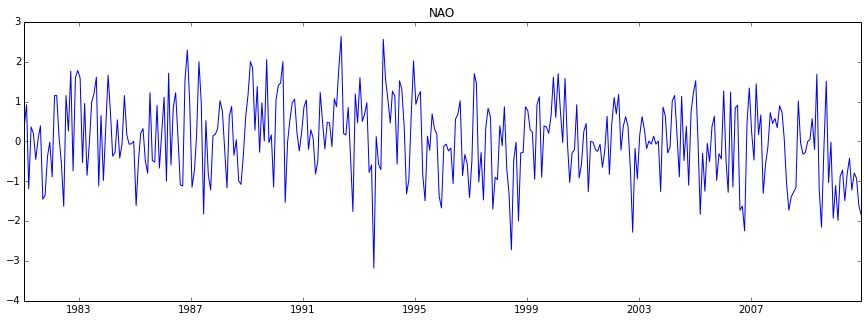

In [17]:
# load NAO data
import datetime
import matplotlib.pyplot as plt

data = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
t=[]
naodata = []
for x in data:
    d=x
    if (d[0] > 1980.) and (d[0]<2011.):
        t.append(datetime.datetime(int(d[0]), int(d[1]), 15))
        naodata.append(d[2])
t = np.asarray(t)
naodata = np.asarray(naodata)
naodata = np.ma.array(naodata, mask=naodata != naodata)  # ensure masked array

# plot NAO
f = plt.figure(figsize=(15,5)); ax=f.add_subplot(111); ax.plot(t, naodata); ax.set_title('NAO')

In [18]:
# now do correlation with temperature anomalies
tmp = ncep.copy()
tmp.apply_temporal_subsetting(datetime.datetime(1981,1,1),datetime.datetime(2010,12,31))
a_ncep = tmp.get_deseasonalized_anomaly(base='all')
Rnao, Snao, Inao, Pnao, Cnao = a_ncep.corr_single(naodata, pthres=0.05)   # takes a while 

Calculating correlation ...


INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


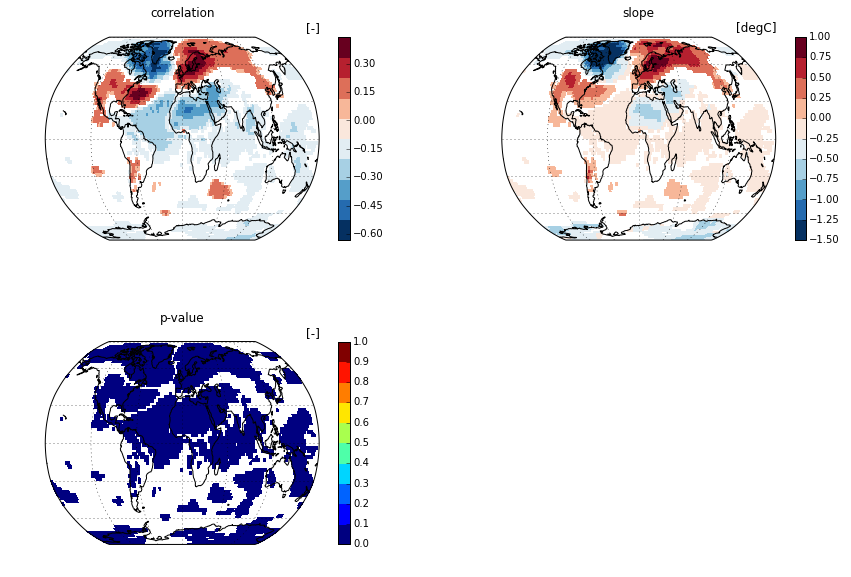

In [19]:
# ... plot results
use_basemap=True
f = plt.figure(figsize=(15,10))
ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2)
ax3 = f.add_subplot(2,2,3)

x = map_plot(Rnao, ax=ax1, use_basemap=use_basemap, cmap_data='RdBu_r')
x = map_plot(Snao, ax=ax2, use_basemap=use_basemap, cmap_data='RdBu_r', vmin=-1.5, vmax=1.)
x = map_plot(Pnao, ax=ax3, use_basemap=use_basemap, vmin=0., vmax=1.)


## Regional analysis

So far so good, Let's say you want to do a regional analysis of your data. First thing you would do is to define a region.

INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


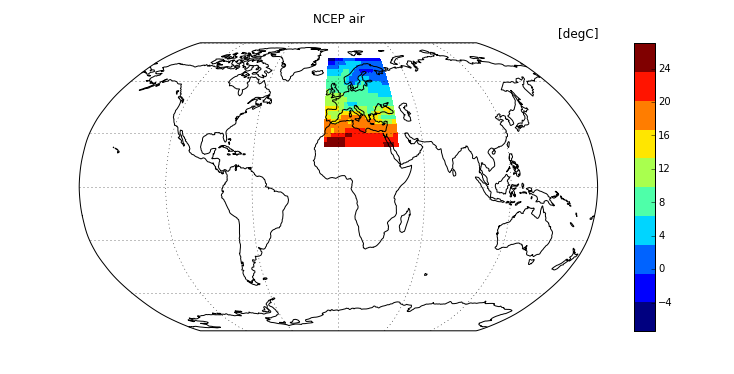

In [20]:
from pycmbs.region import RegionBboxLatLon
europe = RegionBboxLatLon(1, -10., 40., 25., 75., label='Europe')

# do subsetting ...
ncep_europe = ncep.copy()  # copy data object, as regional masking is applied directly on the object
ncep_europe.get_aoi_lat_lon(europe)

f = map_plot(ncep_europe, use_basemap=True)

In [21]:
print ncep_europe.shape

(802, 73, 144)


In [22]:
# cut bounding box, which saves memory
ncep_europe.cut_bounding_box()

(802, 21, 144)
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


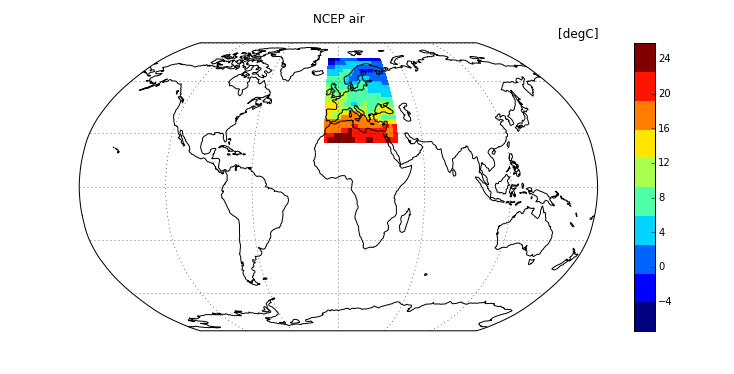

In [23]:
print ncep_europe.shape
f = map_plot(ncep_europe, use_basemap=True)

Calculating correlation ...
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


/home/m300028/shared/dev/svn/pycmbs-assembla/pycmbs/pycmbs/data.py:4916: RuntimeWarning: invalid value encountered in greater
  msk = (P > pthres) | (np.isnan(R))


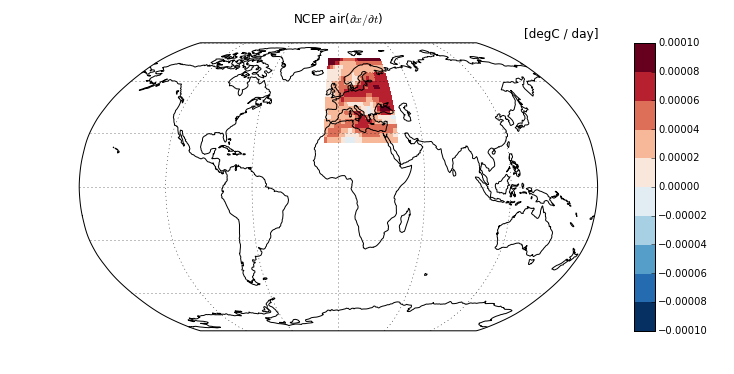

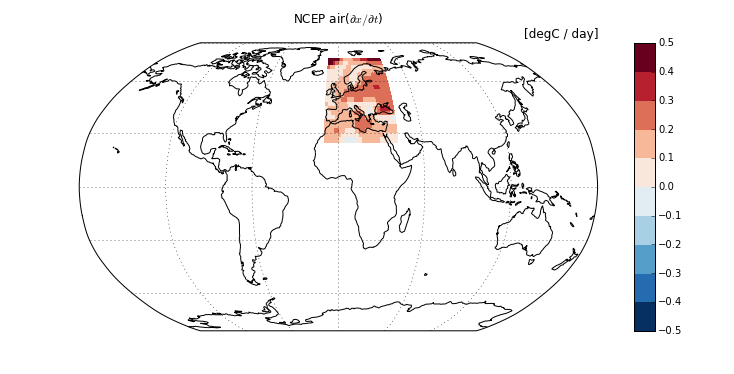

In [24]:
R, S, I, P = ncep_europe.temporal_trend(return_object=True) #, pthres=0.05)
f = map_plot(S,use_basemap=True, cmap_data='RdBu_r', vmin=-0.0001, vmax=0.0001)

# let's say you want the slope in degC/decade on the fly when plotting ...
f = map_plot(S.mulc(365.25*10., copy=False), cmap_data='RdBu_r', vmin=-0.5, vmax=0.5, use_basemap=True)